## Notebook Purpose
This notebook is used to plot high-resolution zoomed-in SMB maps over a section of Khumbu Glacier (Figure 6 C).

#### Last updated: May 23, 2023

## TODO:
- Update imports when new library has been built up with all updates
-Generalise path to data products during revisions, after the data distribution plan is finalized

In [2]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'


In [4]:
import numpy as np 
import geopandas as gpd
import matplotlib.pyplot as plt
from imview import pltlib
import pandas as pd
from pygeotools.lib import warplib,geolib,iolib,malib,filtlib,timelib
import os,sys,glob,shutil
from velocity_proc import glac_dyn, constants, velocity_filter,velocity_timeseries
import warnings
warnings.filterwarnings('ignore')

/swbuild/sbhusha1/miniconda3/envs/bhushanGDAL3/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
%matplotlib inline


In [6]:
%cd /nobackup/sbhusha1/chapter2/changrinup/20230217/

/nobackupp11/sbhusha1/chapter2/changrinup/20230217


In [7]:
vx_fn = '20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip.tif'
vy_fn = '20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1_gauss_fill51px_shpclip.tif'
euldz_fn = 'khumbu_farinotti_2015-11-02_to_2016-10-25_lag_smb_products/khumbu_farinotti_2015-11-02_to_2016-10-25_eulerian_dhdt.tif'
lagdz_fn = 'khumbu_farinotti_2015-11-02_to_2016-10-25_lag_smb_products/khumbu_farinotti_2015-11-02_to_2016-10-25_lagrangian_dhdt.tif'
downslope_dz_fn = 'khumbu_farinotti_2015-11-02_to_2016-10-25_lag_smb_products/khumbu_farinotti_2015-11-02_to_2016-10-25_downslope_dhdt.tif'
smb_fn = 'khumbu_farinotti_2015-11-02_to_2016-10-25_lag_smb_products/khumbu_farinotti_2015-11-02_to_2016-10-25_smb_dhdt.tif'
dem1_fn = '../20151102_aligned/20151102_aligned-trans_source-DEM.tif'
ortho_img1 = 'orthoimage/20151102_10400100125E8E00_ortho_res_0.35m_lake_area.tif'
ortho_img2 = 'orthoimage/20161025_104001002469AD00_ortho_res_0.34m_lake_area.tif'
#ortho_img1_2m = '20151002_10200100457F0C00_ortho_proc/20151002_10200100457F0C00_ortho_res_2.0m.tif'
#ortho_img2_2m = '20161029_103001005E3EFF00_ortho_proc/20161029_103001005E3EFF00_ortho_res_2.0m.tif'
ortho_img1_2m = ortho_img1
ortho_img2_2m = ortho_img2

In [8]:
ds_list = warplib.memwarp_multi_fn([ortho_img1,ortho_img2,vx_fn,vy_fn])


Warping all inputs to the following:
Resolution: 0.35
Extent: [482158.16968629614, 3092045.183213752, 483407.3296862961, 3093057.7032137522]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 4: orthoimage/20151102_10400100125E8E00_ortho_res_0.35m_lake_area.tif
nl: 2893 ns: 3569 res: 0.350
0...10...20...30...40...50...60...70...80...90...2 of 4: orthoimage/20161025_104001002469AD00_ortho_res_0.34m_lake_area.tif
nl: 2893 ns: 3569 res: 0.350
100 - done.
0...10...20...30...40...50...60...70...80...90...3 of 4: 20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1_gauss_fill51px_shpclip.tif
nl: 2893 ns: 3569 res: 0.350
100 - done.
0...10...20...30...40...50...60...70...80...90...4 of 4: 20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20151102_combined_hs__20161

In [9]:
dt = timelib.get_t_factor(timelib.fn_getdatetime(ortho_img1),timelib.fn_getdatetime(ortho_img2))
ortho1,ortho2,vx,vy = [iolib.ds_getma(ds) for ds in ds_list]
_,ortho2_shifted = glac_dyn.compute_lagrangian(ortho1.astype(np.float32),ortho2.astype(np.float32),vx,vy,dt,
                                               annual=True,res=geolib.get_res(ds_list[0])[0],startofpath=True,return_shifted_dem=True)

<Axes: >

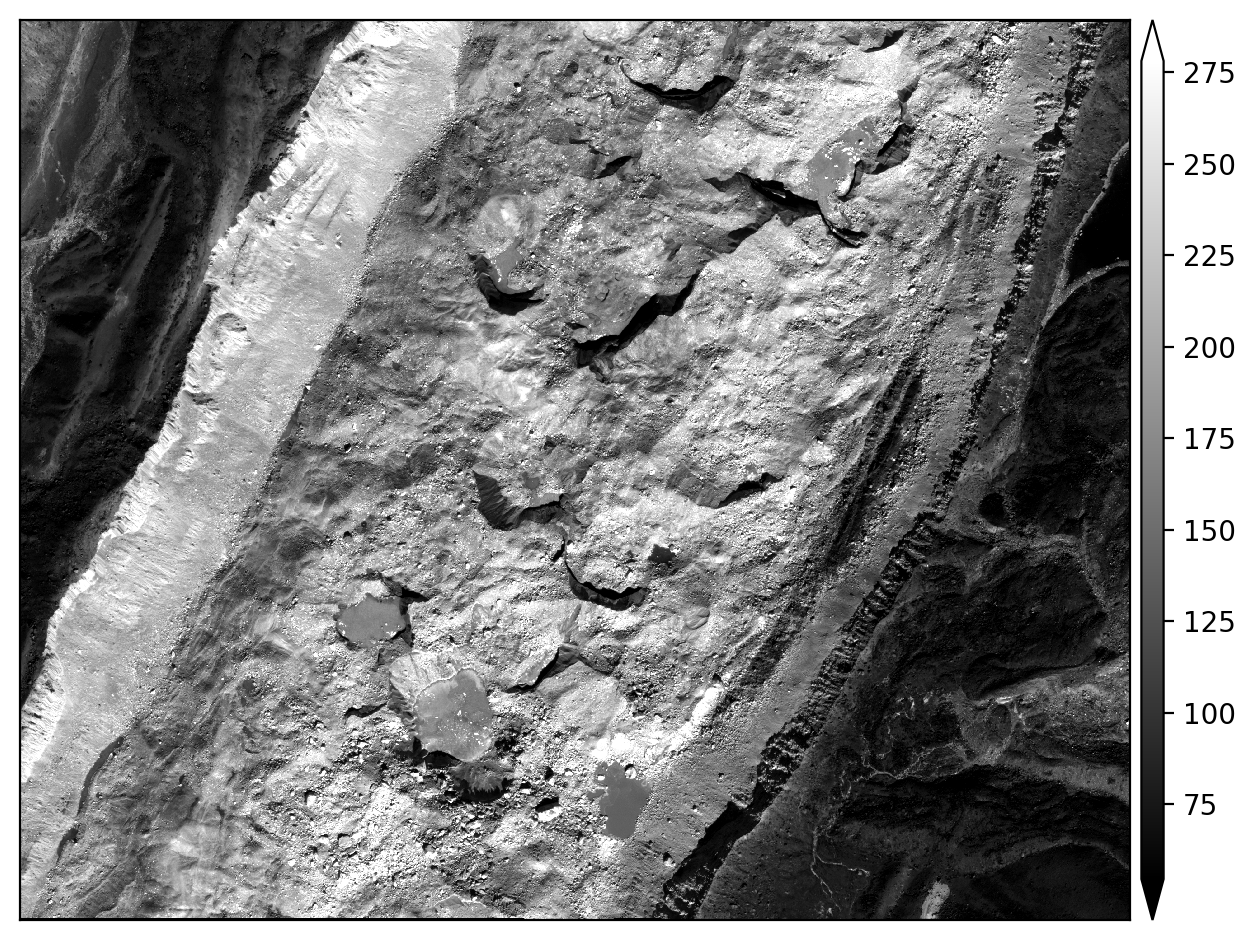

In [10]:
f,ax = plt.subplots()
pltlib.iv(ortho2_shifted,ax=ax,cmap='gray')

<Axes: >

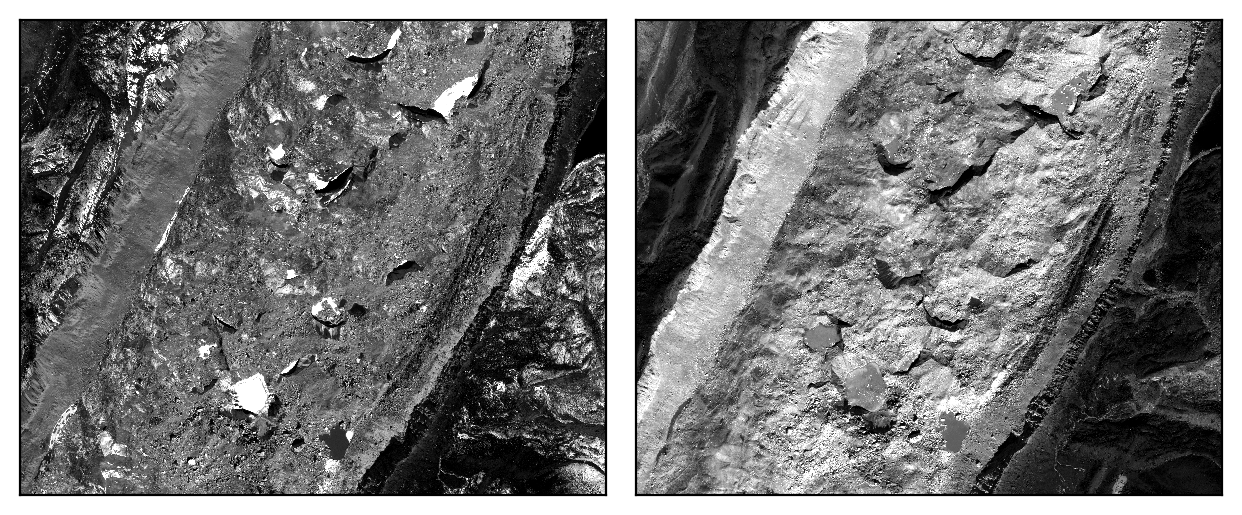

In [11]:
f,ax = plt.subplots(1,2,sharex=True,sharey=True)
pltlib.iv(ortho1,ax=ax[0],cmap='gray',cbar=False)
pltlib.iv(ortho2,ax=ax[1],cmap='gray',cbar=False)

In [12]:
xlim = (935.1684442772494, 1765.6433983095828)
ylim = (2765.5324665626167, 1935.0575125302835)

In [13]:
mask_array = np.ma.getdata(np.ones_like(ortho1))
mask_array[int(ylim[1]):int(ylim[0]),int(xlim[0]):int(xlim[1])] = 0

In [14]:
clip_ortho1 = os.path.splitext(ortho_img1)[0]+'_zoom.tif'
clip_ortho2 = os.path.splitext(ortho_img2)[0]+'_shifted_zoom.tif'
iolib.writeGTiff(np.ma.array(ortho1,mask=mask_array),clip_ortho1,src_ds=ds_list[0])
iolib.writeGTiff(np.ma.array(ortho2_shifted,mask=mask_array),clip_ortho2,src_ds=ds_list[1])

In [15]:
! ndvtrim.py $clip_ortho1

/swbuild/sbhusha1/miniconda3/envs/bhushanGDAL3/lib/python3.9/site-packages/osgeo/gdal.py:287: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(
Loading input raster into masked array
Computing min/max indices for mask
[0, 2893, 0, 3569]
[1935, 2764, 935, 1764]
Updating output geotransform
(482158.16968629614, 0.35, 0.0, 3093057.7032137522, 0.0, -0.35)
(482485.41968629614, 0.35, 0.0, 3092380.4532137522, 0.0, -0.35)
Writing out: orthoimage/20151102_10400100125E8E00_ortho_res_0.35m_lake_area_zoom_trim.tif


In [16]:
! ndvtrim.py $clip_ortho2

/swbuild/sbhusha1/miniconda3/envs/bhushanGDAL3/lib/python3.9/site-packages/osgeo/gdal.py:287: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(
Loading input raster into masked array
Computing min/max indices for mask
[0, 2893, 0, 3569]
[1935, 2764, 935, 1764]
Updating output geotransform
(482158.16968629614, 0.35, 0.0, 3093057.7032137522, 0.0, -0.35)
(482485.41968629614, 0.35, 0.0, 3092380.4532137522, 0.0, -0.35)
Writing out: orthoimage/20161025_104001002469AD00_ortho_res_0.34m_lake_area_shifted_zoom_trim.tif


In [17]:
ds_list_ortho_cliff2 = warplib.memwarp_multi_fn(['orthoimage/20151102_10400100125E8E00_ortho_res_0.35m_lake_area_zoom_trim.tif',
                                                 'orthoimage/20161025_104001002469AD00_ortho_res_0.34m_lake_area_shifted_zoom_trim.tif'])
cliff2_t1,cliff2_t2 = [iolib.ds_getma(ds) for ds in ds_list_ortho_cliff2]
low_res_extent = geolib.ds_extent(ds_list_ortho_cliff2[0])
low_res_ds_list = warplib.memwarp_multi_fn([euldz_fn,lagdz_fn,downslope_dz_fn,smb_fn,dem1_fn],extent=low_res_extent)
euldz,lagdz,downslope_dz,smb,dem1 = [iolib.ds_getma(ds) for ds in low_res_ds_list]


Warping all inputs to the following:
Resolution: 0.35
Extent: [482485.41968629614, 3092089.9532137522, 482775.91968629614, 3092380.4532137522]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 2: orthoimage/20151102_10400100125E8E00_ortho_res_0.35m_lake_area_zoom_trim.tif
2 of 2: orthoimage/20161025_104001002469AD00_ortho_res_0.34m_lake_area_shifted_zoom_trim.tif

Warping all inputs to the following:
Resolution: 2.0
Extent: [482485.41968629614, 3092089.9532137522, 482775.91968629614, 3092380.4532137522]
Projection: '+proj=utm +zone=45 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 5: khumbu_farinotti_2015-11-02_to_2016-10-25_lag_smb_products/khumbu_farinotti_2015-11-02_to_2016-10-25_eulerian_dhdt.tif
nl: 145 ns: 145 res: 2.000
100 - done.
0...10...20...30...40...50...60...70...80...90...2 of 5: khumbu_farinotti_2015-11-02_to_2016-10-25_lag_smb_products/khumbu_farinotti_2015-11-02_to_2016-10-25_lagrangian_dhdt.tif
nl: 145 ns: 145 r

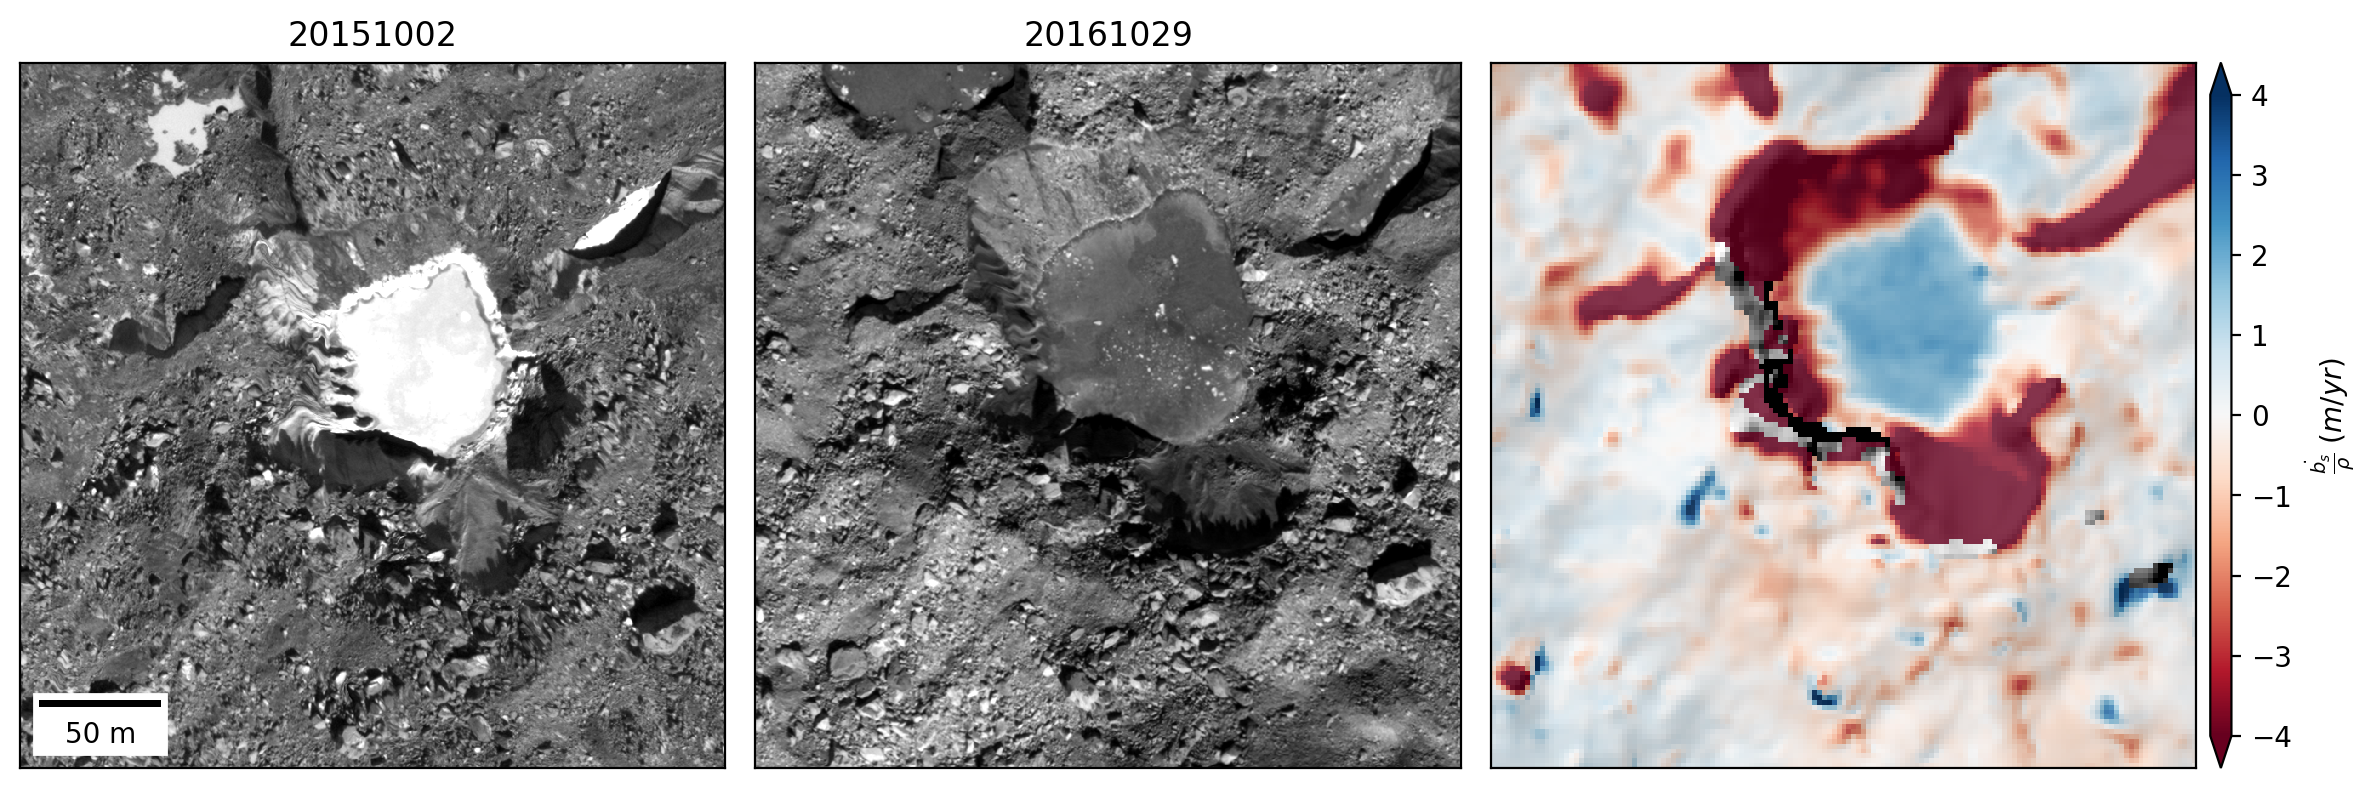

In [18]:
f,ax = plt.subplots(1,3,figsize=(12,8))
pltlib.iv(cliff2_t1,ax=ax[0],cmap='gray',scalebar=False,skinny=False,cbar=False,title='20151002',
          clim=malib.calcperc(cliff2_t1,(0.01,97)))
pltlib.add_scalebar(ax=ax[0],res=geolib.get_res(ds_list[0])[0],location='lower left')
pltlib.iv(cliff2_t2,ax=ax[1],cmap='gray',scalebar=False,skinny=False,cbar=False,title='20161029',
          clim=malib.calcperc(cliff2_t2,(1,99.9)))
pltlib.iv(smb,ds=low_res_ds_list[-1],hillshade=True,scalebar=False,full_bg_stretch=True,overlay_alpha=0.8,
          ax=ax[2],cmap='RdBu',clim=(-4,4),skinny=False,label=r'$\frac{\dot{{b}_{s}}}{\rho}\;(m/yr)$')
plt.tight_layout()
f.savefig('../../figures/khumbu_zoomin_3panel1_full_res_upper_area.png',dpi=300,bbox_inches='tight',pad_inches=0.1)

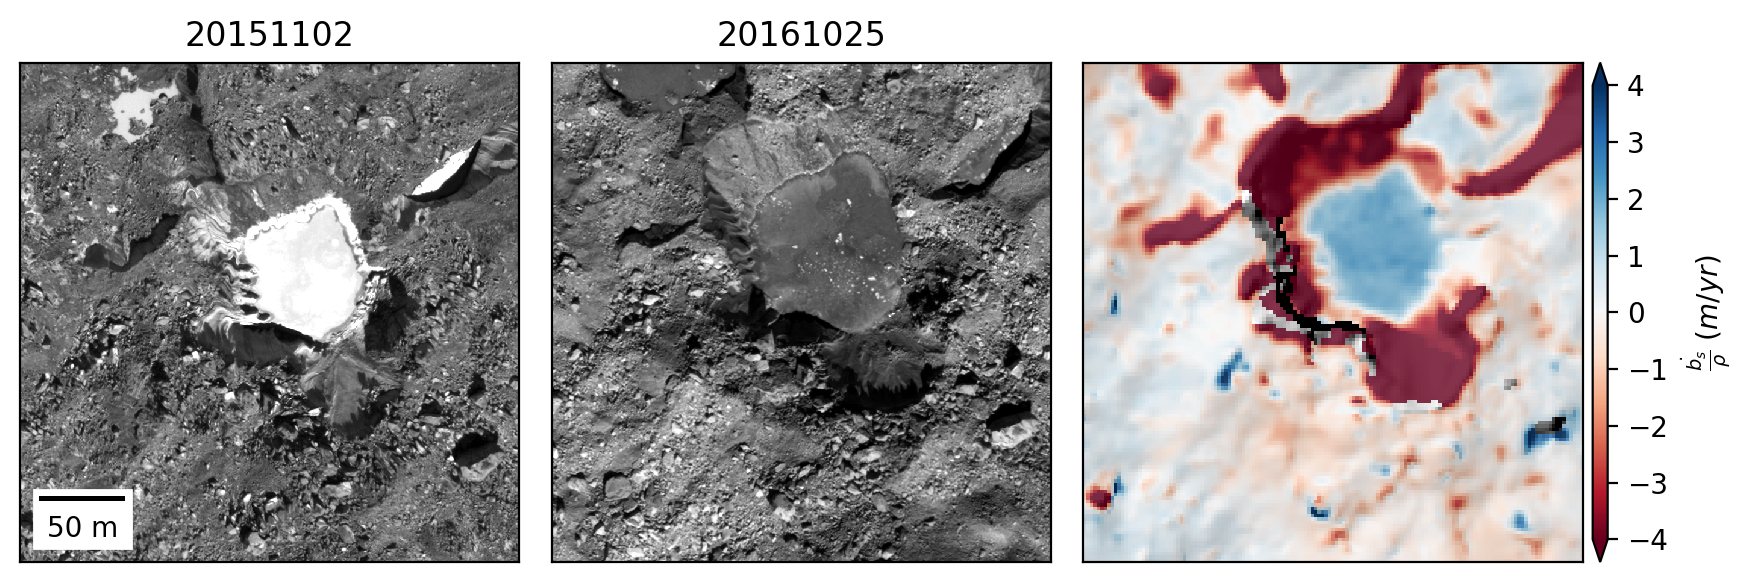

In [19]:
f,ax = plt.subplots(1,3,figsize=(9,3))
pltlib.iv(cliff2_t1,ax=ax[0],cmap='gray',scalebar=False,skinny=False,cbar=False,title='20151102',
          clim=malib.calcperc(cliff2_t1,(0.01,97)))
pltlib.add_scalebar(ax=ax[0],res=geolib.get_res(ds_list[0])[0],location='lower left')
pltlib.iv(cliff2_t2,ax=ax[1],cmap='gray',scalebar=False,skinny=False,cbar=False,title='20161025',
          clim=malib.calcperc(cliff2_t2,(1,99.9)))
pltlib.iv(smb,ds=low_res_ds_list[-1],hillshade=True,scalebar=False,full_bg_stretch=True,overlay_alpha=0.8,
          ax=ax[2],cmap='RdBu',clim=(-4,4),skinny=False,label=r'$\frac{\dot{{b}_{s}}}{\rho}\;(m/yr)$')
plt.tight_layout()
f.savefig('../../figures/khumbu_zoomin_3panel1_full_res_upper_area_small.png',dpi=300,bbox_inches='tight',pad_inches=0.1)